<img src="https://github.com/sobester/ADRpy/raw/master/docs/ADRpy/ADRpy_splash.png" width="40%" align="left">

Constraint analysis at the conceptual design stage in ADRpy is a matter of laying out the design brief (based on the design mission), the basic definition of the design and an estimate of its performance figures, each in its own dictionary. This notebook demonstrates the process for a single-engine piston aircraft - the figures are broadly based on **G-OUAV**, a **Sherwood Scout** operated by the University of Southampton Aviation Society.

### Before you start... click on the video below for an introduction and a 'user's guide'

[![4. Wing and propulsion system sizing](http://img.youtube.com/vi/TMM7mE1NjaE/0.jpg)](https://www.youtube.com/watch?v=TMM7mE1NjaE)

### Preamble

You will need NumPy, Matplotlib and, of course, ADRpy - before you run the notebook, make sure they are up to date (by running `pip install [package_name] --upgrade` for all three).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as patheffects
from ADRpy import unitconversions as co
from ADRpy import constraintanalysis as ca
from ADRpy import atmospheres as at

# A Constraint Analysis Case Study: G-OUAV
<img src="https://github.com/sobester/ADRpy/raw/master/docs/ADRpy/img/G-OUAV-banner1.png" width="100%" align="left">

In [2]:
designatm = at.Atmosphere()

In [3]:
designbrief = {'rwyelevation_m':co.feet2m(295), 'groundrun_m':90, # <- Take-off requirements
               'stloadfactor': 2.5, 'turnalt_m': 1000, 'turnspeed_ktas': 70, # <- Turn requirements
               'climbalt_m': 1500, 'climbspeed_kias': 50, 'climbrate_fpm': 1000, # <- Climb requirements
               'cruisealt_m': 0, 'cruisespeed_ktas': 110, 'cruisethrustfact': 1.0, # <- Cruise requirements
               'servceil_m': 15000, 'secclimbspd_kias': 50, # <- Service ceiling requirements
               'vstallclean_kcas': 38} # <- Required clean stall speed

In [4]:
TOW_kg = 450

In [5]:
designdefinition = {'aspectratio':7.43, 'sweep_le_deg':0, 'sweep_mt_deg':0,
                    'weightfractions': {'turn': 1.0, 'climb': 1.0, 'cruise': 1.0, 'servceil': 1.0},
                    'weight_n': co.kg2n(TOW_kg)}

designpropulsion = "piston"

In [6]:
designperformance = {'CDTO': 0.05, 'CLTO': 0.6, 'CLmaxTO': 1.6, 'CLmaxclean': 1.8, 'mu_R': 0.02,
                    'CDminclean': 0.04,
                    'etaprop': {'take-off': 0.6, 'climb': 0.6, 'cruise': 0.75, 'turn': 0.75, 'servceil': 0.75}}


Everything is now ready for the instantiation of an aircraft concept object, which will serve as the input to the constraint analysis:

In [7]:
concept = ca.AircraftConcept(designbrief, designdefinition, designperformance, designatm, designpropulsion)


In [8]:
wslist_pa = np.arange(300, 800, 2.5)

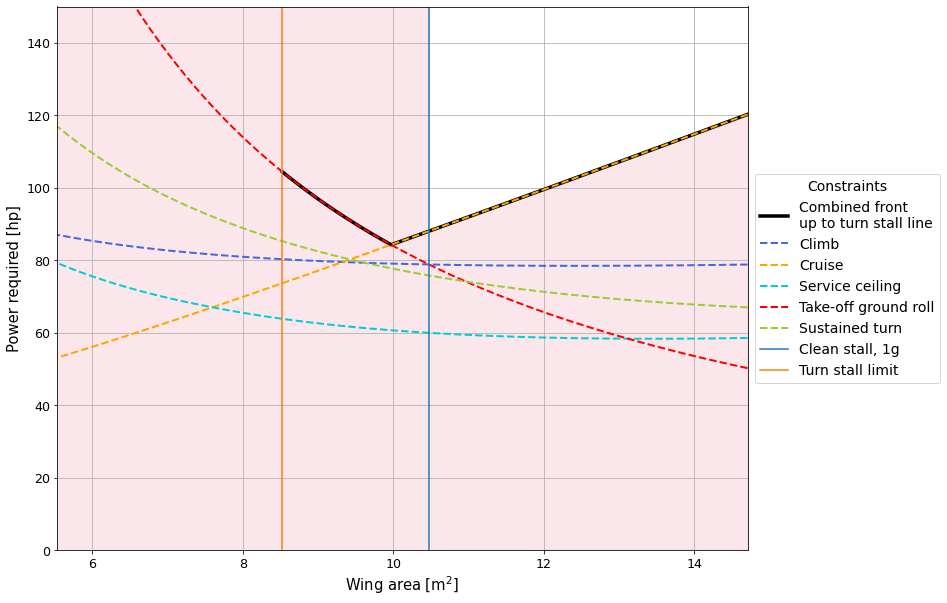

In [9]:
a = concept.propulsionsensitivity_monothetic(wingloading_pa=wslist_pa, show='combined', y_var='p_hp', x_var='s_m2', y_lim=150)

### Breaking out individual constraints
...for direct access to the data and each curve handle, for adding several curves for each constraint (e.g., for different atmospheres), for formatting it all just the way you want it, etc...

In [12]:
preq = concept.powerrequired(wslist_pa, TOW_kg) 

Smin_m2 = concept.smincleanstall_m2(TOW_kg)

We can now generate a plot of the various constraint curves in the power versus wing area space:

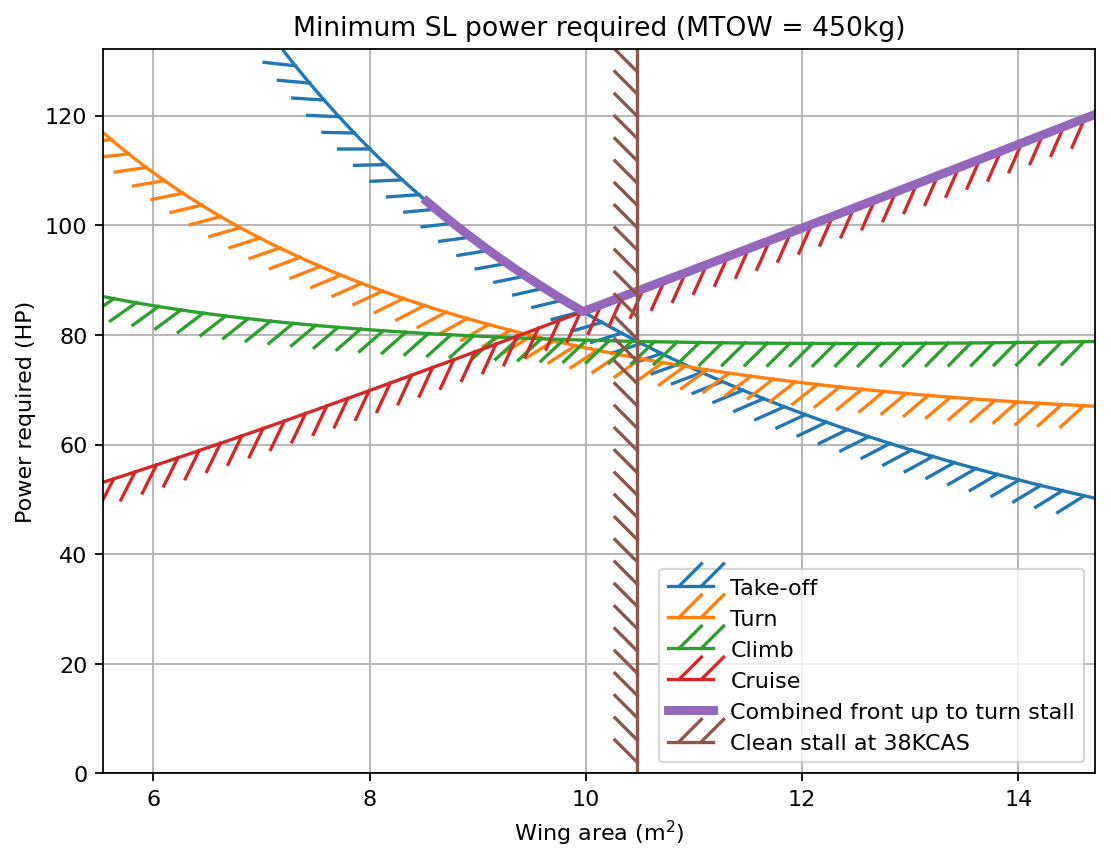

In [13]:
wingarea_m2 = co.kg2n(TOW_kg) / wslist_pa # x axis

plt.rcParams["figure.figsize"] = [8,6]
plt.rcParams['figure.dpi'] = 160

barbs = [patheffects.withTickedStroke()]

plt.plot(wingarea_m2, preq['take-off'],  label = 'Take-off', path_effects=barbs)
plt.plot(wingarea_m2, preq['turn'], label = 'Turn', path_effects=barbs)
plt.plot(wingarea_m2, preq['climb'], label = 'Climb', path_effects=barbs)
plt.plot(wingarea_m2, preq['cruise'], label = 'Cruise', path_effects=barbs)

combplot = plt.plot(wingarea_m2, preq['combined'], label = 'Combined front up to turn stall')

plt.setp(combplot, linewidth=4)

stall_label = 'Clean stall at ' + str(designbrief['vstallclean_kcas']) + 'KCAS'

plt.plot([Smin_m2, Smin_m2], [0, 1500], label = stall_label, path_effects=barbs)

legend = plt.legend(loc='lower right')

plt.ylabel("Power required (HP)")
plt.xlabel("Wing area (m$^2$)")

plt.title("Minimum SL power required (MTOW = " + str(round(TOW_kg)) + "kg)")

plt.xlim(min(wingarea_m2), max(wingarea_m2))
plt.ylim(0, max(preq['combined']) * 1.1)

plt.grid(True)
plt.show()